# Regression 

### our taregt here is to predict the HARDSHIP_INDEX of any community, but to chose predictors from a set of columns in a data set, we do either pearson coefficient or ANOVA test, then analyze the p_value or/and f test score , but note that ANOVA test requires a categorical predictor

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('data.csv')
df.columns

Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME',
       'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
       'PERCENT_AGED_16__UNEMPLOYED', 'CASE_NUMBER', 'age25_nodiploma',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'income_in_EGP', 'HARDSHIP_INDEX',
       'low', 'medium', 'high'],
      dtype='object')

In [39]:
from scipy import stats 

In [40]:
pearson_coef , p_value = stats.pearsonr(df['HARDSHIP_INDEX'], df['age25_nodiploma'])

In [41]:
pearson_coef

0.7989693400772131

In [42]:
p_value

5.2087112050801556e-18

### the results here indicates that there is a strong correlation as p_value is <0.001 and pearson_coef is near 1

In [43]:
pearson_coef , p_value = stats.pearsonr(df['HARDSHIP_INDEX'], df['PERCENT_AGED_UNDER_18_OR_OVER_64'])

In [44]:
pearson_coef

0.699513009515659

In [45]:
p_value

2.074150798951351e-12

### the results here indicates that there is a strong correlation as p_value is <0.001 and pearson_coef is near 1

## 1- linear regression 

In [47]:
df.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,CASE_NUMBER,age25_nodiploma,PERCENT_AGED_UNDER_18_OR_OVER_64,income_in_EGP,HARDSHIP_INDEX,low,medium,high
0,1.0,Rogers Park,7.7,23.6,8.7,HK587712,18.2,27.5,359085.0,-0.388146,1,0,0
1,2.0,West Ridge,7.8,17.2,8.8,HK456306,20.8,38.5,345600.0,-0.142320,1,0,0
2,3.0,Uptown,3.8,24.0,8.9,HT233595,11.8,22.2,536805.0,-1.055388,0,1,0
3,4.0,Lincoln Square,3.4,10.9,8.2,HT133522,13.4,25.5,562860.0,-1.160742,0,1,0
4,5.0,North Center,0.3,7.5,5.2,HZ138551,4.5,26.2,856845.0,-1.547040,0,1,0


In [48]:
df['HARDSHIP_INDEX'] =df['HARDSHIP_INDEX'] + 10 

In [49]:
df.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,CASE_NUMBER,age25_nodiploma,PERCENT_AGED_UNDER_18_OR_OVER_64,income_in_EGP,HARDSHIP_INDEX,low,medium,high
0,1.0,Rogers Park,7.7,23.6,8.7,HK587712,18.2,27.5,359085.0,9.611854,1,0,0
1,2.0,West Ridge,7.8,17.2,8.8,HK456306,20.8,38.5,345600.0,9.857680,1,0,0
2,3.0,Uptown,3.8,24.0,8.9,HT233595,11.8,22.2,536805.0,8.944612,0,1,0
3,4.0,Lincoln Square,3.4,10.9,8.2,HT133522,13.4,25.5,562860.0,8.839258,0,1,0
4,5.0,North Center,0.3,7.5,5.2,HZ138551,4.5,26.2,856845.0,8.452960,0,1,0


In [50]:
from sklearn.linear_model import LinearRegression 

In [51]:
lm = LinearRegression()

### A-simple linear regression 

In [52]:
df.columns

Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME',
       'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
       'PERCENT_AGED_16__UNEMPLOYED', 'CASE_NUMBER', 'age25_nodiploma',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'income_in_EGP', 'HARDSHIP_INDEX',
       'low', 'medium', 'high'],
      dtype='object')

In [212]:
x = df[['age25_nodiploma']]
y = df[['HARDSHIP_INDEX']]

In [213]:
lm.fit(x , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [214]:
yhat_simpler = lm.predict(x)

In [215]:
yhat_simpler[0:5]

array([[ 9.84355014],
       [10.01950058],
       [ 9.41044135],
       [ 9.51871855],
       [ 8.91642664]])

In [ ]:
b1 =lm.intercept_

In [ ]:
b0 = lm.coef_

In [ ]:
y = b1 + b0 *14.2

In [ ]:
y 

In [61]:
df.columns

Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME',
       'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
       'PERCENT_AGED_16__UNEMPLOYED', 'CASE_NUMBER', 'age25_nodiploma',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'income_in_EGP', 'HARDSHIP_INDEX',
       'low', 'medium', 'high'],
      dtype='object')

### B-multiple linear regression 

In [216]:
t = df[['PERCENT_AGED_UNDER_18_OR_OVER_64', 'age25_nodiploma']]
m = df[['HARDSHIP_INDEX']]
lm.fit(t , m)
yhat_multibler = lm.predict(t)


In [217]:
t

,PERCENT_AGED_UNDER_18_OR_OVER_64,age25_nodiploma
0,27.5,18.2
1,38.5,20.8
2,22.2,11.8
3,25.5,13.4
4,26.2,4.5
...,...,...
71,42.6,13.7
72,36.8,4.3
73,40.3,10.8
74,30.3,10.9


In [218]:
b0 = lm.intercept_
b0

array([6.76704348])

In [219]:
b = lm.coef_
for x in b:
    print(x)

[0.06052264 0.05212174]


In [220]:
y = b0  + 0.06*8.5 + 0.05* 12.5

In [221]:
y

array([7.90204348])

<h3>2)  Model Evaluation using Visualization</h3>

## A- Regression Plot

### first, age25_nodiploma as predictor 

In [67]:
import seaborn as sns

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 13.252847944500443)

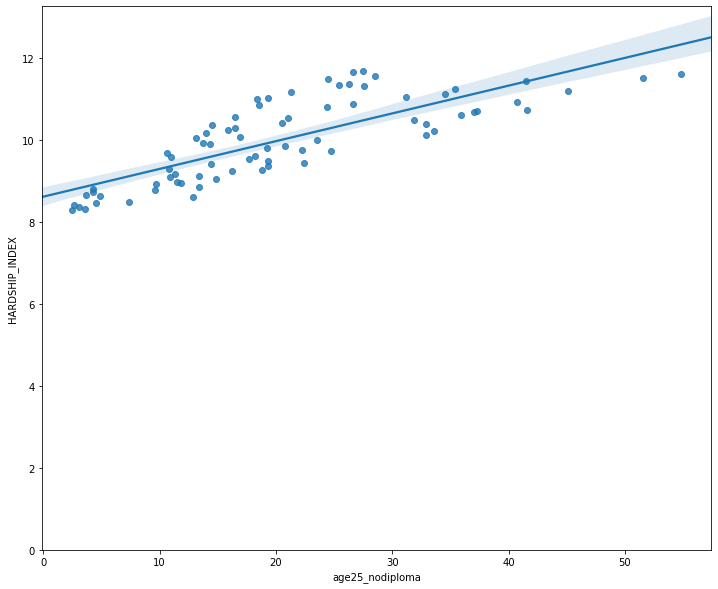

In [68]:
height = 10
width = 12
plt.figure( figsize = (width , height))
sns.regplot(x = 'age25_nodiploma' , y = 'HARDSHIP_INDEX' , data = df)
plt.ylim(0,)

### second , PERCENT_AGED_UNDER_18_OR_OVER_64 as predictor 

(0, 12.277982105900039)

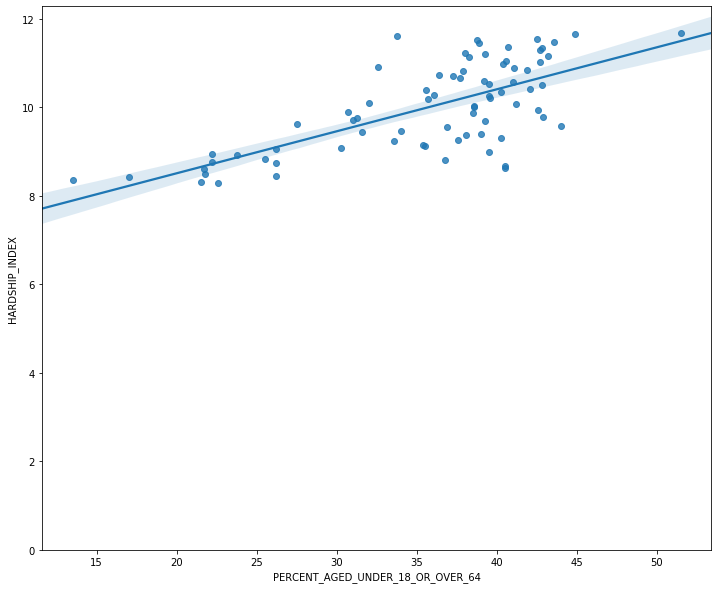

In [69]:
height = 10
width = 12
plt.figure( figsize = (width , height))
sns.regplot(x = 'PERCENT_AGED_UNDER_18_OR_OVER_64' , y = 'HARDSHIP_INDEX' , data = df)
plt.ylim(0,)

## B- Residual plot

### first, age25_nodiploma as predictor 

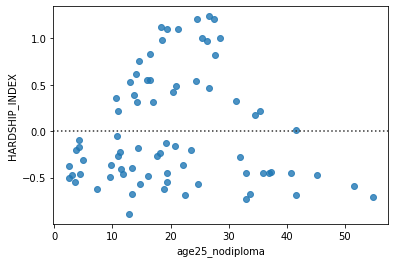

In [70]:
sns.residplot(df['age25_nodiploma'] , df['HARDSHIP_INDEX'])

<i>What is this plot telling us?</i>
### here residuals are distributed around the mean of zero indicating that linear plot may be appropriate 

### second , PERCENT_AGED_UNDER_18_OR_OVER_64 as predictor 

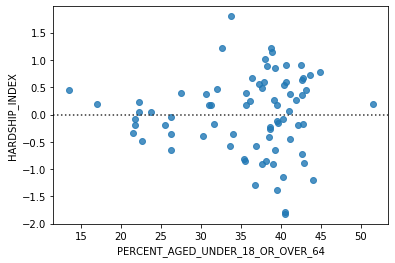

In [71]:
sns.residplot(df['PERCENT_AGED_UNDER_18_OR_OVER_64'] , df['HARDSHIP_INDEX'])

<i>What is this plot telling us?</i>
### here residuals are distributed around the mean of zero indicating that linear plot may be appropriate 

# C-Distribution plot

### first, age25_nodiploma as predictor

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


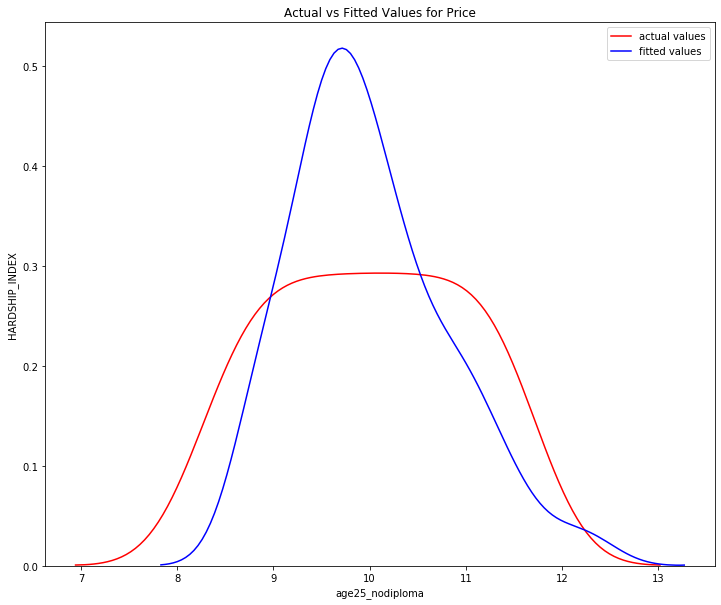

In [72]:
plt.figure(figsize=(width, height))

z= df[['age25_nodiploma']]
y = df[['HARDSHIP_INDEX']]
lm.fit(z , y)
yhat = lm.predict(z)
ax1 = sns.distplot(df['HARDSHIP_INDEX'] , hist =False , color = "r" , label= 'actual values')
sns.distplot(yhat , hist =False , color = "b", label = "fitted values", ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('age25_nodiploma')
plt.ylabel('HARDSHIP_INDEX')

plt.show()
plt.close()

In [73]:
# this plot indicates that

### second , PERCENT_AGED_UNDER_18_OR_OVER_64 as predictor 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


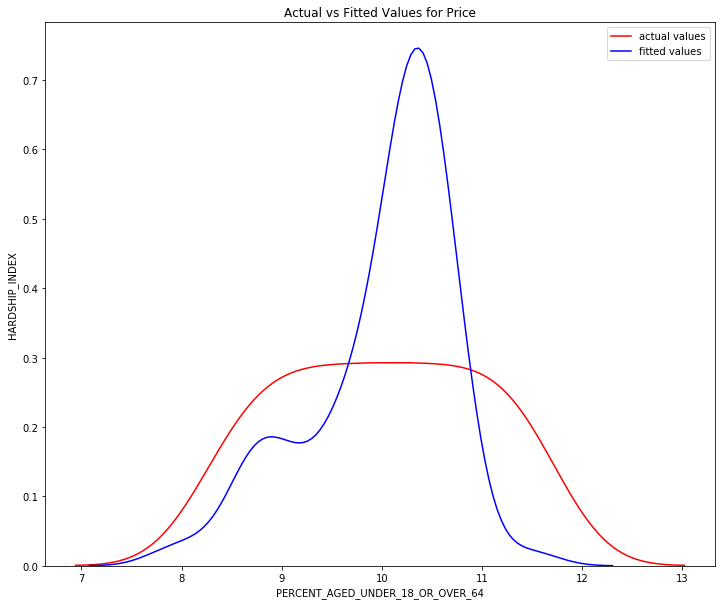

In [74]:
plt.figure(figsize=(width, height))

z= df[['PERCENT_AGED_UNDER_18_OR_OVER_64']]
y = df[['HARDSHIP_INDEX']]
lm.fit(z , y)
yhat = lm.predict(z)
ax1 = sns.distplot(df['HARDSHIP_INDEX'] , hist =False , color = "r" , label= 'actual values')
sns.distplot(yhat , hist =False , color = "b", label = "fitted values", ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('PERCENT_AGED_UNDER_18_OR_OVER_64')
plt.ylabel('HARDSHIP_INDEX')

plt.show()
plt.close()

### the previous two plots  We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values indicating that there is big different between the predicted values and the actual values, this model is not a good choice to work with

## third , we use both PERCENT_AGED_UNDER_18_OR_OVER_64 and age25_nodiploma

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


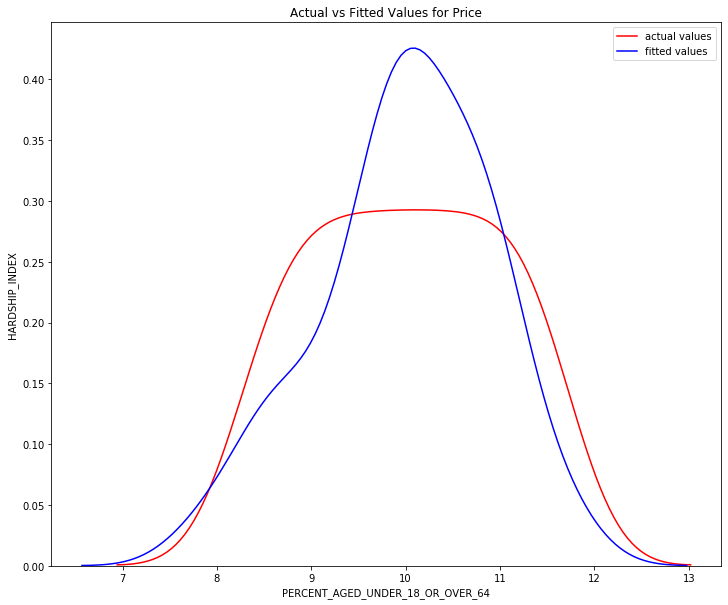

In [75]:
plt.figure(figsize=(width, height))
z= df[['PERCENT_AGED_UNDER_18_OR_OVER_64','age25_nodiploma' ]]
y = df[['HARDSHIP_INDEX']]
lm.fit(z , y)
yhat = lm.predict(z)
ax1 = sns.distplot(df['HARDSHIP_INDEX'] , hist =False , color = "r" , label= 'actual values')
sns.distplot(yhat , hist =False , color = "b", label = "fitted values", ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('PERCENT_AGED_UNDER_18_OR_OVER_64')
plt.ylabel('HARDSHIP_INDEX')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h2>Part 3: Polynomial Regression and Pipelines</h2>

### Polynomial Regression with 1D

### incase of 1D we can use numpy

In [159]:
# this part is here just to creat visulization of the new created points 
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(8, 10, 12)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [160]:
df.columns

Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME',
       'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
       'PERCENT_AGED_16__UNEMPLOYED', 'CASE_NUMBER', 'age25_nodiploma',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'income_in_EGP', 'HARDSHIP_INDEX',
       'low', 'medium', 'high'],
      dtype='object')

In [308]:
o = df['HARDSHIP_INDEX']
w = df['PERCENT_AGED_UNDER_18_OR_OVER_64']

In [309]:
f = np.polyfit(w , o , 3)

In [310]:
p = np.poly1d(f)

In [311]:
p

poly1d([-1.69850437e-05,  2.15268466e-03,  1.15472721e-02,  7.58743743e+00])

In [312]:
p(x)

array([7.58814418, 7.58804514])

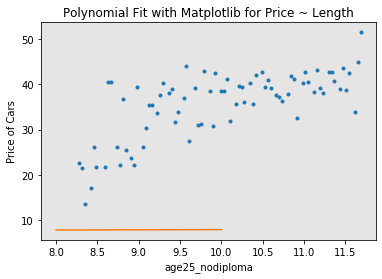

In [313]:
PlotPolly(p, o, w, 'age25_nodiploma')

### Polynomial Regression with more than 1D

### here we can't use numpy poly fit , we use pre-processing library in scikit-learn 

In [274]:
from sklearn.preprocessing import PolynomialFeatures

In [275]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [276]:
df

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,CASE_NUMBER,age25_nodiploma,PERCENT_AGED_UNDER_18_OR_OVER_64,income_in_EGP,HARDSHIP_INDEX,low,medium,high
0,1.0,Rogers Park,7.7,23.6,8.7,HK587712,18.2,27.5,359085.0,9.611854,1,0,0
1,2.0,West Ridge,7.8,17.2,8.8,HK456306,20.8,38.5,345600.0,9.857680,1,0,0
2,3.0,Uptown,3.8,24.0,8.9,HT233595,11.8,22.2,536805.0,8.944612,0,1,0
3,4.0,Lincoln Square,3.4,10.9,8.2,HT133522,13.4,25.5,562860.0,8.839258,0,1,0
4,5.0,North Center,0.3,7.5,5.2,HZ138551,4.5,26.2,856845.0,8.452960,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,73.0,Washington Height,1.1,16.9,20.8,HY291329,13.7,42.6,295695.0,9.927916,1,0,0
72,74.0,Mount Greenwood,1.0,3.4,8.7,HJ678713,4.3,36.8,515715.0,8.804140,1,0,0
73,75.0,Morgan Park,0.8,13.2,15.0,NaN,10.8,40.3,407235.0,9.295792,1,0,0
74,76.0,O'Hare,3.6,15.4,7.1,HX155070,10.9,30.3,387420.0,9.085084,1,0,0


In [277]:
x_polly = pr.fit_transform(df[['age25_nodiploma', 'PERCENT_AGED_UNDER_18_OR_OVER_64']])

In [278]:
x_polly

array([[1.00000e+00, 1.82000e+01, 2.75000e+01, 3.31240e+02, 5.00500e+02,
        7.56250e+02],
       [1.00000e+00, 2.08000e+01, 3.85000e+01, 4.32640e+02, 8.00800e+02,
        1.48225e+03],
       [1.00000e+00, 1.18000e+01, 2.22000e+01, 1.39240e+02, 2.61960e+02,
        4.92840e+02],
       [1.00000e+00, 1.34000e+01, 2.55000e+01, 1.79560e+02, 3.41700e+02,
        6.50250e+02],
       [1.00000e+00, 4.50000e+00, 2.62000e+01, 2.02500e+01, 1.17900e+02,
        6.86440e+02],
       [1.00000e+00, 2.60000e+00, 1.70000e+01, 6.76000e+00, 4.42000e+01,
        2.89000e+02],
       [1.00000e+00, 3.60000e+00, 2.15000e+01, 1.29600e+01, 7.74000e+01,
        4.62250e+02],
       [1.00000e+00, 2.50000e+00, 2.26000e+01, 6.25000e+00, 5.65000e+01,
        5.10760e+02],
       [1.00000e+00, 1.15000e+01, 3.95000e+01, 1.32250e+02, 4.54250e+02,
        1.56025e+03],
       [1.00000e+00, 1.34000e+01, 3.55000e+01, 1.79560e+02, 4.75700e+02,
        1.26025e+03],
       [1.00000e+00, 4.90000e+00, 4.05000e+01, 2.4

###  dimensions would get greater, so we would need to normalize the steps of each feature simultaneously 

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [173]:
scale = StandardScaler()

In [174]:
scale.fit(df[['age25_nodiploma', 'PERCENT_AGED_UNDER_18_OR_OVER_64']])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [175]:
x_scale = scale.transform(df[['age25_nodiploma', 'PERCENT_AGED_UNDER_18_OR_OVER_64']])

In [176]:
x_scale

array([[-1.97115710e-01, -1.12624949e+00],
       [ 2.45693457e-02,  3.74937650e-01],
       [-7.42802001e-01, -1.84954875e+00],
       [-6.06380428e-01, -1.39919261e+00],
       [-1.36522543e+00, -1.30366252e+00],
       [-1.52722604e+00, -2.55920086e+00],
       [-1.44196256e+00, -1.94507884e+00],
       [-1.53575239e+00, -1.79496013e+00],
       [-7.68381046e-01,  5.11409208e-01],
       [-6.06380428e-01, -3.44770253e-02],
       [-1.33112003e+00,  6.47880767e-01],
       [-5.21116945e-01,  4.43173429e-01],
       [ 1.05625749e+00, -5.12127480e-01],
       [-1.03325879e-01, -2.39184363e-01],
       [ 1.60990918e-01, -5.66716103e-01],
       [-3.67642676e-01, -2.93772986e-01],
       [ 2.54780750e-01,  3.88584806e-01],
       [ 1.43141681e+00,  2.11171780e-01],
       [ 1.79804979e+00,  8.83473773e-02],
       [ 3.57096929e-01, -6.48599038e-01],
       [-4.87011552e-01, -1.30366252e+00],
       [ 1.26941620e+00,  3.06701871e-01],
       [-6.49012170e-01, -1.91778453e+00],
       [ 3.

<h2>Pipeline</h2>

### Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. with pipeline we can perform data analysis with regression , PolynomialFeatures and standardscaler, in one step as follow  

### We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [178]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [179]:
pipe=Pipeline(Input)

In [183]:
z = df[['age25_nodiploma', 'PERCENT_AGED_UNDER_18_OR_OVER_64']]
y = df['HARDSHIP_INDEX']

In [184]:
pipe.fit(z,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

###  we can normalize the data, perform a transform and produce a prediction simultaneously

In [187]:
ypipe=pipe.predict(z)
ypipe[0:10]

array([ 9.34120095, 10.192084  ,  8.8409217 ,  9.00390835,  8.448093  ,
        8.31345442,  8.34271164,  8.27084062,  9.58481914,  9.4605036 ])

<h2> Measures for In-Sample Evaluation</h2>

 <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>

### let's test each model

#### 1-simple linear regression

#### Let's calculate the R^2

In [230]:
k = df[['age25_nodiploma']]
l = df[['HARDSHIP_INDEX']]

In [231]:
lm.fit(k,l)
lm.score(k,l)

0.6383520063834172

#### Let's calculate the MSE

In [233]:
yhat_simpler[0:4]

array([[ 9.84355014],
       [10.01950058],
       [ 9.41044135],
       [ 9.51871855]])

calculate the MSE:

In [234]:
from sklearn.metrics import mean_squared_error

In [235]:
mse = mean_squared_error(l, yhat_simpler)

In [236]:
mse

0.3568894673847858

<h3>Model 2: Multiple Linear Regression</h3>

Let's calculate the R^2

In [334]:
t

,PERCENT_AGED_UNDER_18_OR_OVER_64,age25_nodiploma
0,27.5,18.2
1,38.5,20.8
2,22.2,11.8
3,25.5,13.4
4,26.2,4.5
...,...,...
71,42.6,13.7
72,36.8,4.3
73,40.3,10.8
74,30.3,10.9


In [238]:
lm.fit(t,m)
lm.score(t,m)

0.8039394114927966

calculate the MSE:

In [239]:
mse = mean_squared_error(m, yhat_multibler)

In [240]:
mse

0.19348084392158238

<h3>Model 3: Polynomial Fit</h3>

Let's calculate the R^2

In [258]:
e = df[['age25_nodiploma']]
n = df[['HARDSHIP_INDEX']]

In [259]:
lm.fit(e,n)
lm.score(e,n)

0.6383520063834172

calculate the MSE:

In [314]:
p(x)

array([7.58814418, 7.58804514])

In [317]:
mse = mean_squared_error(n[0:2], p(x))

In [318]:
mse

4.623321007579651

<h2> Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>

In [323]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [324]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [325]:
e = df[['age25_nodiploma']]
n = df[['HARDSHIP_INDEX']]

In [326]:
lm.fit(e , n)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [331]:
yhat = lm.predict(new_input)
yhat[0:3]

array([[8.67957028],
       [8.74724352],
       [8.81491677]])

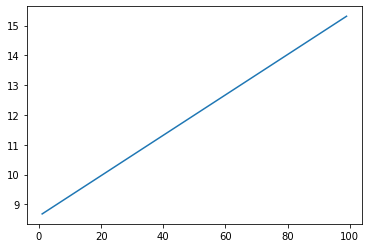

In [333]:
plt.plot(new_input , yhat)

<h3>Decision Making: Determining a Good Model Fit</h3>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using age25_nodiploma as a Predictor Variable of Hardship index.
<ul>
    <li>R-squared: 0.6383520063834172</li>
    <li>MSE: 0.3568894673847858</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using PERCENT_AGED_UNDER_18_OR_OVER_64, age25_nodiploma  as Predictor Variables of Hardship index.
<ul>
    <li>R-squared: 0.8039394114927966</li>
    <li>MSE: 0.19348084392158238</li>
</ul>
</p>
    
<p>Polynomial Fit: Using age25_nodiploma as a Predictor Variable of Hardship index.
<ul>
    <li>R-squared: 0.6383520063834172</li>
    <li>MSE: 4.623321007579651</li>
</ul>
</p>

<h3>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</h3>

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>The MSE of SLR is  0.3568894673847858  while MLR has an MSE of 0.19348084392158238.  The MSE of MLR is smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (0.6383520063834172) and the R-squared for the MLR (0.8039394114927966).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

<h3>Simple Linear Model (SLR) vs Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit increased the MSE</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is equal to  the R-squared for the SLR</li>
</ul>
<p>Since the Polynomial Fit resulted in an increased MSE and has no change on R-squared, we can conclude that this <b>was not</b> a better fit model than the simple linear regression for predicting hardship index with age25_nodiploma  as a predictor variable.</p>

<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also larger than for the Polynomial Fit.</li>
</ul>

<h2>Conclusion:</h2>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict hardship index from our dataset.</p>

# Created by Sayed Kamal